In [1]:
import pandas as pd
df = pd.read_csv('property_permits.csv')
import matplotlib.pyplot as plt
import seaborn as sn

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [3]:
#Printing out all the columns
df.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
     

In [4]:
#Gettting the unique values
df['Existing Construction Type'].unique()

array([ 3.,  1.,  5., nan,  2.,  4.])

In [5]:
# Getting the number of nulls in a column
c= df['Street Number Suffix'].isna().sum()
print(c/198900)

0.98885872297637


In [6]:
# Generating a list of column names where 80% or more of the rows are null
columns_remove =[]
for column in df.columns:
    sum_columns = df[column].isna().sum()
    if sum_columns/198900 > 0.8:
        columns_remove.append(column)
 

In [7]:
columns_remove

['Street Number Suffix',
 'Unit',
 'Unit Suffix',
 'Structural Notification',
 'Voluntary Soft-Story Retrofit',
 'Fire Only Permit',
 'TIDF Compliance',
 'Site Permit']

In [8]:
df.drop(columns_remove, axis=1)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,St,street space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,St,fire alarm upgrade ref 201704123852,...,2.0,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,St,street space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,St,street space permit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [9]:
# Dropping the columns
df= df.drop(columns_remove, axis=1)
df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,St,street space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,St,fire alarm upgrade ref 201704123852,...,2.0,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,St,street space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,St,street space permit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [10]:
# Removing the rows in where more than 80% of the rows are null
df = df[df.isnull().sum(axis=1) < 28]
df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,St,street space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,St,fire alarm upgrade ref 201704123852,...,2.0,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,St,street space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,St,street space permit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


## Plotting the co relation matrix using df.corr()

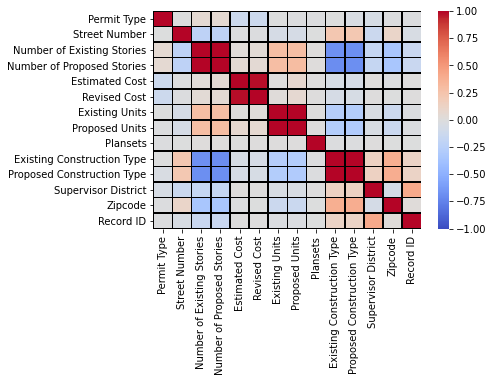

In [11]:
# Plotting the correlation matrix
corrMatrix = df.corr()
corrMatrix
sn.heatmap(corrMatrix,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',linewidths=0.5, linecolor='black')
plt.show()

## From the matrix , we get an idea about the columns that are co-related
## These attribute pairs are : These can be used as variables for our model

* Number of Existing Stories - Number of Proposed Stories
* Estimated cost - revise cost
* Existing Construction Type - Proposed Construction Type

## There is a driect corelation between : Number of Existing Stories - Number of Proposed Stories. 
## Number of Existing Stories  can be used as an input to predict target Number of Proposed Stories. 
### The scatter plot for the same is given below

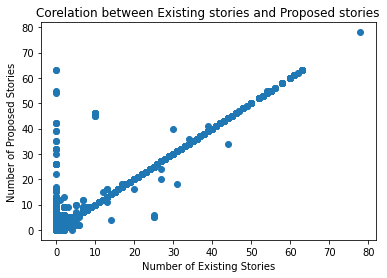

In [12]:
plt.scatter(x=df['Number of Existing Stories'], y=df['Number of Proposed Stories'])
plt.xlabel('Number of Existing Stories')
plt.ylabel('Number of Proposed Stories')
plt.title('Corelation between Existing stories and Proposed stories')
plt.show()

array([[<AxesSubplot:title={'center':'Number of Proposed Stories'}>]],
      dtype=object)

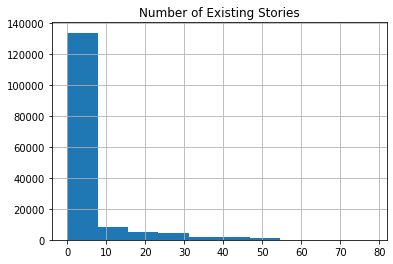

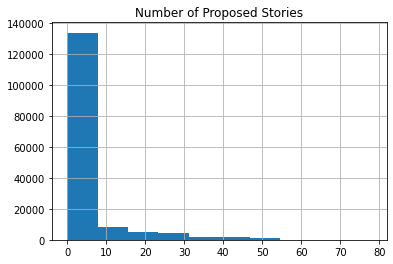

In [13]:
# Histogram for the same are

df.hist(column='Number of Existing Stories')
df.hist(column='Number of Proposed Stories')

## There is a driect corelation between : Estimated Cost - Revised Cost
## Estimated cost can be used to predict Target cost
### The scatter plot for the same is given below

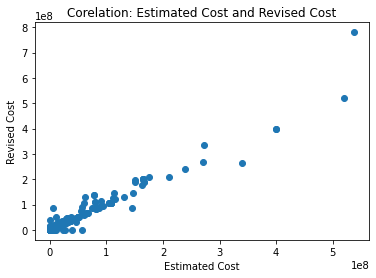

In [14]:
plt.scatter(x=df['Estimated Cost'],y=df['Revised Cost'])
plt.ylabel('Revised Cost')
plt.xlabel('Estimated Cost')
plt.title('Corelation: Estimated Cost and Revised Cost')
plt.show()

array([[<AxesSubplot:title={'center':'Estimated Cost'}>]], dtype=object)

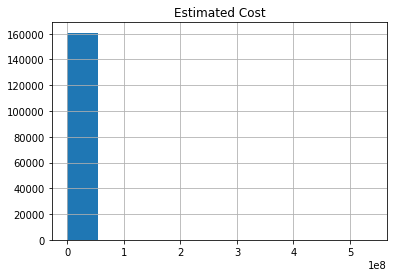

In [15]:
# Histogram for estimated cost
df.hist(column = 'Estimated Cost')


## There is a driect corelation between : Exisitng Construction type - Proposed construction type
## Existing Construction Type can be used to predict Proposed Construction Type
### The scatter plot for the same is given below

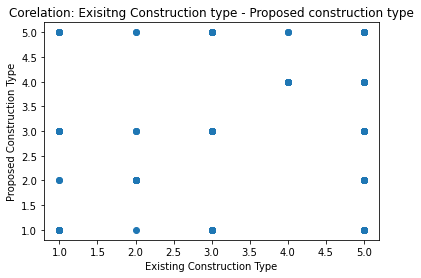

In [16]:

data = [df['Existing Construction Type'],df['Proposed Construction Type']]
plt.scatter(df['Existing Construction Type'],df['Proposed Construction Type']) 
plt.xlabel('Existing Construction Type')
plt.ylabel('Proposed Construction Type')
plt.title('Corelation: Exisitng Construction type - Proposed construction type')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fed0f8c0490>,
 'caps': [<matplotlib.lines.Line2D at 0x7fed0f6653d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fed0f675b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fed0f641050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fed0f641750>],
 'means': []}

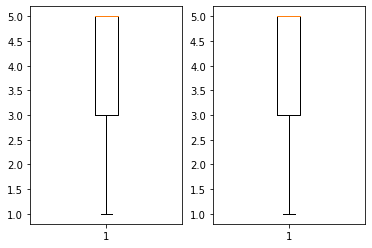

In [17]:
# Box plot for Existing Construction Type and Proposed Construction Type
plt.subplot(1,2, 1) 
plt.boxplot(df['Existing Construction Type'].dropna()) 

plt.subplot(1,2, 2) 
plt.boxplot(df['Proposed Construction Type'].dropna()) 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


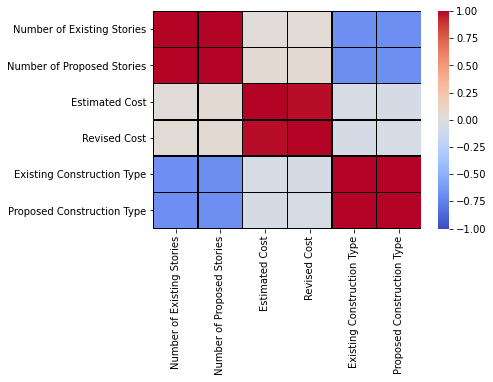

In [18]:
# Corelation matrix for the 6 attibutes of that ate most positvivly corelated
df2 = pd.DataFrame( pd.np.empty((198900, 0)))
df2.index = df.index
df2[['Number of Existing Stories', 'Number of Proposed Stories','Estimated Cost','Revised Cost','Existing Construction Type','Proposed Construction Type']] = df[['Number of Existing Stories', 'Number of Proposed Stories','Estimated Cost','Revised Cost','Existing Construction Type','Proposed Construction Type']]


corrMatrix_new = df2.corr()
corrMatrix
sn.heatmap(corrMatrix_new,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',linewidths=0.5, linecolor='black')
plt.show()